In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import scipy.stats as st

In [2]:
covcount_path = os.path.join("Resources", "covidcountdataframe.csv")
povla_path = os.path.join("Resources", "Poverty__LA_.csv")

In [3]:
covidcount = pd.read_csv(covcount_path)
poverty = pd.read_csv(povla_path)

In [4]:
poverty.head()

,Policy Area,Dataset,Variable,Year,Count,Percent,Tract,Tract Number,Neighborhood,GEOID,Location,Row ID,Date,Denominator,Denominator Description
0,Employment & Income,Poverty,Below 100% Poverty Threshold,2010,1793.0,26.422045,Census Tract 1012.10,101210,Tujunga,1400000US06037101210,"(34.25297726, -118.29074307)",Below_100%_Poverty_Threshold_2010_1400000US060...,01/01/2010,6786.0,Population with Known Poverty Status
1,Employment & Income,Poverty,Below 100% Poverty Threshold,2010,445.0,13.989311,Census Tract 1012.20,101220,Tujunga,1400000US06037101220,"(34.25161333, -118.28164445)",Below_100%_Poverty_Threshold_2010_1400000US060...,01/01/2010,3181.0,Population with Known Poverty Status
2,Employment & Income,Poverty,Below 100% Poverty Threshold,2010,193.0,5.068277,Census Tract 1013,101300,Tujunga,1400000US06037101300,"(34.24878243, -118.27101097)",Below_100%_Poverty_Threshold_2010_1400000US060...,01/01/2010,3808.0,Population with Known Poverty Status
3,Employment & Income,Poverty,Below 100% Poverty Threshold,2010,461.0,12.415836,Census Tract 1014,101400,Tujunga,1400000US06037101400,"(34.24285824, -118.29417570)",Below_100%_Poverty_Threshold_2010_1400000US060...,01/01/2010,3713.0,Population with Known Poverty Status
4,Employment & Income,Poverty,Below 100% Poverty Threshold,2010,86.0,4.671374,Census Tract 1021.03,102103,Shadow Hills,1400000US06037102103,"(34.22508412, -118.35420021)",Below_100%_Poverty_Threshold_2010_1400000US060...,01/01/2010,1841.0,Population with Known Poverty Status


In [5]:
poverty = poverty.drop(['Policy Area', 'Dataset','Variable','Year','Tract','Tract Number','GEOID','Location','Row ID','Date'], axis=1)

In [6]:
poverty.head()

,Count,Percent,Neighborhood,Denominator,Denominator Description
0,1793.0,26.422045,Tujunga,6786.0,Population with Known Poverty Status
1,445.0,13.989311,Tujunga,3181.0,Population with Known Poverty Status
2,193.0,5.068277,Tujunga,3808.0,Population with Known Poverty Status
3,461.0,12.415836,Tujunga,3713.0,Population with Known Poverty Status
4,86.0,4.671374,Shadow Hills,1841.0,Population with Known Poverty Status


In [7]:
poverty = poverty.drop(poverty[poverty.Neighborhood.isin(['Elysian Park', 'Vernon','Harvard Park'])].index)

In [8]:
poverty2 = poverty.drop(['Denominator Description'], axis=1)

In [9]:
poverty2 = poverty2.rename(columns={'Percent':'PctPov','Neighborhood':'Region'})

In [10]:
poverty2.count()

Count          46246
PctPov         46246
Region         46816
Denominator    46246
dtype: int64

In [11]:
poverty2

,Count,PctPov,Region,Denominator
0,1793.0,26.422045,Tujunga,6786.0
1,445.0,13.989311,Tujunga,3181.0
2,193.0,5.068277,Tujunga,3808.0
3,461.0,12.415836,Tujunga,3713.0
4,86.0,4.671374,Shadow Hills,1841.0
...,...,...,...,...
46871,NaN,NaN,Westchester,NaN
46872,NaN,NaN,El Segundo,NaN
46873,0.0,0.000000,San Pedro,49.0
46874,NaN,NaN,Long Beach,NaN


In [12]:
poverty3 = poverty2.dropna()

In [13]:
poverty3

,Count,PctPov,Region,Denominator
0,1793.0,26.422045,Tujunga,6786.0
1,445.0,13.989311,Tujunga,3181.0
2,193.0,5.068277,Tujunga,3808.0
3,461.0,12.415836,Tujunga,3713.0
4,86.0,4.671374,Shadow Hills,1841.0
...,...,...,...,...
46861,123.0,18.836142,Wilmington,653.0
46863,10.0,7.246377,Pacific Palisades,138.0
46865,0.0,0.000000,Hansen Dam,33.0
46868,8.0,3.587444,Sepulveda Basin,223.0


In [14]:
povneigh = poverty3.groupby(['Region'])

In [15]:
neigh = povneigh['Region'].first()
neighpovsum = povneigh['Count'].sum()
neighdenomsum = povneigh['Denominator'].sum()

In [16]:
povpct = pd.DataFrame({'PovPct':(neighpovsum/neighdenomsum)*100})

In [17]:
povpct

,PovPct
Region,
Acton,15.730389
Adams-Normandie,47.955883
Agoura Hills,9.344640
Agua Dulce,10.728017
Alhambra,25.304516
...,...
Willowbrook,40.479482
Wilmington,41.888597
Windsor Square,21.305865


In [18]:
povpct.reset_index(level=0, inplace=True)

In [19]:
povpct.loc[povpct['Region'] == 'Rolling Hills']

,Region,PovPct
175,Rolling Hills,3.985932


In [20]:
covidpovcount = pd.merge(covidcount, povpct, on='Region')

In [21]:
covidpovcount

,Unnamed: 0,Time Stamp,Region,Latitude,Longitude,Number of cases,Time,Day,Population,CovPct,PovPct
0,0,2020-03-16,Torrance,33.835849,-118.340629,2,1584316800000000000,0.0,145492.0,0.001375,12.759818
1,1,2020-03-17,Torrance,33.835849,-118.340629,1,1584403200000000000,1.0,145492.0,0.000687,12.759818
2,2,2020-03-18,Torrance,33.835849,-118.340629,2,1584489600000000000,2.0,145492.0,0.001375,12.759818
3,3,2020-03-19,Torrance,33.835849,-118.340629,2,1584576000000000000,3.0,145492.0,0.001375,12.759818
4,4,2020-03-20,Torrance,33.835849,-118.340629,2,1584662400000000000,4.0,145492.0,0.001375,12.759818
...,...,...,...,...,...,...,...,...,...,...,...
64857,64857,2021-03-14,Downtown,34.042849,-118.247673,3842,1615680000000000000,363.0,53398.0,7.195026,46.841854
64858,64858,2021-03-15,Downtown,34.042849,-118.247673,3844,1615766400000000000,364.0,53398.0,7.198771,46.841854
64859,64859,2021-03-16,Downtown,34.042849,-118.247673,3844,1615852800000000000,365.0,53398.0,7.198771,46.841854
64860,64860,2021-03-17,Downtown,34.042849,-118.247673,3842,1615939200000000000,366.0,53398.0,7.195026,46.841854


In [22]:
covidpovcount.to_csv('covidpovcountdataframe.csv')
covidpovcount.PovPct.max()

64.43708362334692

In [23]:
RollingHills = covidpovcount.loc[covidpovcount['Region'] == 'Rolling Hills']

In [24]:
UniversityPark = covidpovcount.loc[covidpovcount['Region'] == 'University Park']

In [25]:
RHx = RollingHills['Day']
RHy = RollingHills['CovPct']
UPx = UniversityPark['Day']
UPy = UniversityPark['CovPct']

In [26]:
#CovperPov = plt.figure()
#sub = CovperPov.add_subplot()
#RollingHills = sub.scatter(RHx, RHy, marker=None, linestyle='solid', lw=1, label='Rolling Hills')
#UniversityPark = sub.scatter(UPx, UPy, marker=None, linestyle='solid', lw=1, label='University Park')



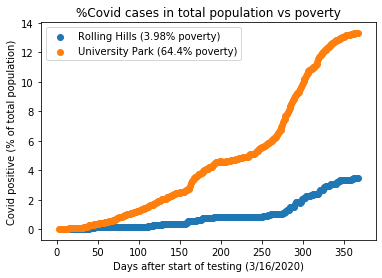

In [46]:
RH=plt.scatter(RHx,RHy,label='Rolling Hills (3.98% poverty)')
UP=plt.scatter(UPx,UPy,label='University Park (64.4% poverty)')
plt.legend(handles=[RH,UP], loc="best")
plt.title('%Covid cases in total population vs poverty')
plt.xlabel('Days after start of testing (3/16/2020)')
plt.ylabel('Covid positive (% of total population)')
plt.savefig('plots/neighhighestlowestpov.png')
plt.show()

In [28]:
#create budget per student bins

PovBin = [0,9,19,29,39,70]


#create budget per student labels

PovLabel = ['<10%', '10%-19%','20%-29%','30%-39%','>=40%']


covidpovcount['Poverty Class'] = pd.cut(covidpovcount['PovPct'], 
                                                    PovBin, labels=PovLabel)
covidpovcount['Poverty Class'].value_counts()

10%-19%    17970
20%-29%    16977
>=40%      12578
30%-39%    10850
<10%        6487
Name: Poverty Class, dtype: int64

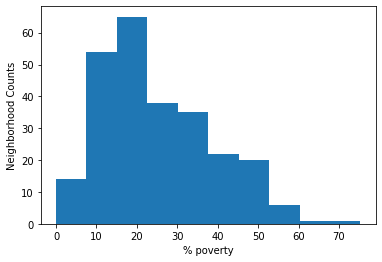

24.945292940276428
21.463856620902526


In [29]:
plt.hist(povpct['PovPct'], bins=10)
plt.xlabel('% poverty')
plt.ylabel('Neighborhood Counts')
plt.savefig('plots/neighcountperpoverty.png')
plt.show()
print(povpct['PovPct'].mean())
print(povpct['PovPct'].median())

In [30]:
LastDay = covidpovcount[covidpovcount['Day'] == 367.0]

In [31]:
LastDay

,Unnamed: 0,Time Stamp,Region,Latitude,Longitude,Number of cases,Time,Day,Population,CovPct,PovPct,Poverty Class
367,367,2021-03-18,Torrance,33.835849,-118.340629,6931,1616025600000000000,367.0,145492.0,4.763836,12.759818,10%-19%
735,735,2021-03-18,Diamond Bar,34.028623,-117.810337,3144,1616025600000000000,367.0,45645.0,6.887940,10.946256,10%-19%
1103,1103,2021-03-18,Granada Hills,34.266156,-118.517434,6348,1616025600000000000,367.0,58564.0,10.839424,15.032533,10%-19%
1466,1466,2021-03-18,Glendora,34.136119,-117.865339,4740,1616025600000000000,367.0,55146.0,8.595365,15.467986,10%-19%
1834,1834,2021-03-18,Glendale,34.146942,-118.247847,19343,1616025600000000000,367.0,200232.0,9.660294,24.473077,20%-29%
...,...,...,...,...,...,...,...,...,...,...,...,...
63216,63216,2021-03-18,Cerritos,33.864429,-118.053932,3022,1616025600000000000,367.0,50143.0,6.026763,10.662939,10%-19%
63572,63572,2021-03-18,Koreatown,34.058013,-118.300809,5495,1616025600000000000,367.0,104346.0,5.266134,40.025916,>=40%
63928,63928,2021-03-18,Huntington Park,33.982704,-118.212034,11050,1616025600000000000,367.0,58353.0,18.936473,45.004521,>=40%
64284,64284,2021-03-18,Wilmington,33.780016,-118.262509,8253,1616025600000000000,367.0,55860.0,14.774436,41.888597,>=40%


In [32]:
LDPov = LastDay['PovPct']
LDCov = LastDay['CovPct']

The r-value is 0.43


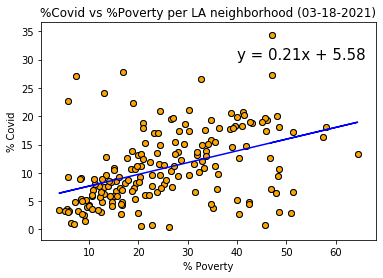

In [33]:
RH=plt.scatter(LDPov,LDCov)

CovPovcorrelation = st.pearsonr(LDPov, LDCov)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(LDPov, LDCov)
regress_values = LDPov * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(LDPov,LDCov, facecolors='orange', edgecolors='black')
plt.xlabel('% Poverty')
plt.ylabel('% Covid')
plt.title('%Covid vs %Poverty per LA neighborhood (03-18-2021)')
plt.plot(LDPov,regress_values,"b-")
plt.annotate(line_eq,(40,30),fontsize=15,color="black")
plt.savefig('plots/LastDayPovvCov.png')

print(f"The r-value is {round(CovPovcorrelation[0],2)}")




plt.show()

In [34]:
Dayselect = covidpovcount['Day'].between(200,250,inclusive=True)

covidpovcount200250 = covidpovcount[Dayselect] 

In [35]:
covidpovcount200250

,Unnamed: 0,Time Stamp,Region,Latitude,Longitude,Number of cases,Time,Day,Population,CovPct,PovPct,Poverty Class
200,200,2020-10-02,Torrance,33.835849,-118.340629,1455,1601596800000000000,200.0,145492.0,1.000055,12.759818,10%-19%
201,201,2020-10-03,Torrance,33.835849,-118.340629,1460,1601683200000000000,201.0,145492.0,1.003492,12.759818,10%-19%
202,202,2020-10-04,Torrance,33.835849,-118.340629,1463,1601769600000000000,202.0,145492.0,1.005554,12.759818,10%-19%
203,203,2020-10-05,Torrance,33.835849,-118.340629,1465,1601856000000000000,203.0,145492.0,1.006928,12.759818,10%-19%
204,204,2020-10-06,Torrance,33.835849,-118.340629,1472,1601942400000000000,204.0,145492.0,1.011739,12.759818,10%-19%
...,...,...,...,...,...,...,...,...,...,...,...,...
64740,64740,2020-11-17,Downtown,34.042849,-118.247673,1045,1605571200000000000,246.0,53398.0,1.957002,46.841854,>=40%
64741,64741,2020-11-18,Downtown,34.042849,-118.247673,1058,1605657600000000000,247.0,53398.0,1.981348,46.841854,>=40%
64742,64742,2020-11-19,Downtown,34.042849,-118.247673,1074,1605744000000000000,248.0,53398.0,2.011311,46.841854,>=40%
64743,64743,2020-11-20,Downtown,34.042849,-118.247673,1099,1605830400000000000,249.0,53398.0,2.058130,46.841854,>=40%


In [36]:


over40povcov = pd.Series(np.where(covidpovcount200250['Poverty Class'] == '>=40%', covidpovcount200250['CovPct'], 'NaN')).astype(np.float).dropna()



over40quartiles = over40povcov.quantile([.25,.5,.75])
over40lowerq = over40quartiles[0.25]
over40upperq = over40quartiles[.75]
over40iqr = over40upperq-over40lowerq
    

over40LowerBound = over40lowerq - (1.5*over40iqr)
over40UpperBound = over40upperq + (1.5*over40iqr) 




over40outliers = [x for x in over40povcov if x > over40UpperBound or x < over40LowerBound]

print(f"The lower quartile of Covid Pct in >=40% is: {over40lowerq}")
print(f"The upper quartile of Covid Pct in >=40% is: {over40upperq}")
print(f"The interquartile range Covid Pct in >=40% is: {over40iqr}")
print(f"The median Covid Pct in >=40% is: {over40quartiles[0.5]} ")
print(f"Outliers in Covid Pct in >=40% are: {over40outliers} ")


The lower quartile of Covid Pct in >=40% is: 1.8953711311969323
The upper quartile of Covid Pct in >=40% is: 5.269437263869556
The interquartile range Covid Pct in >=40% is: 3.374066132672624
The median Covid Pct in >=40% is: 4.5795843033620685 
Outliers in Covid Pct in >=40% are: [10.377990139387668, 10.470813804857263, 10.562115770892934, 10.642765840891107, 10.686895124475011, 10.790370685982102, 10.924280236167753, 11.006452005599854, 11.125144561446225] 


In [37]:
# Extract final tumor volumes for Ceftamine treated animals

under10povcov = pd.Series(np.where(covidpovcount200250['Poverty Class'] == '<10%', covidpovcount200250['CovPct'], 'NaN')).astype(np.float).dropna()

# Calculate quartiles, upper and lower bounds for Ceftamin

under10quartiles = under10povcov.quantile([.25,.5,.75])
under10lowerq = under10quartiles[0.25]
under10upperq = under10quartiles[.75]
under10iqr = under10upperq-under10lowerq
    

under10LowerBound = under10lowerq - (1.5*under10iqr)
under10UpperBound = under10upperq + (1.5*under10iqr) 


# Determine outliers using upper and lower bounds

under10outliers = [x for x in under10povcov if x > under10UpperBound or x < under10LowerBound]

print(f"The lower quartile of Covid Pct in <10% is: {under10lowerq}")
print(f"The upper quartile of Covid Pct in <10% is: {under10upperq}")
print(f"The interquartile range Covid Pct in <10% is: {under10iqr}")
print(f"The median Covid Pct in <10% is: {under10quartiles[0.5]} ")
print(f"Outliers in Covid Pct in <10% are: {under10outliers} ")


The lower quartile of Covid Pct in <10% is: 0.7313119671519159
The upper quartile of Covid Pct in <10% is: 1.7502895356222214
The interquartile range Covid Pct in <10% is: 1.0189775684703055
The median Covid Pct in <10% is: 1.0283570136873477 
Outliers in Covid Pct in <10% are: [4.424545693968923, 4.424545693968923, 4.424545693968923, 4.424545693968923, 4.503555438504082, 4.503555438504082, 4.450882275480644, 4.529892020015803, 4.608901764550962, 4.608901764550962, 4.635238346062682, 4.661574927574401, 4.661574927574401, 4.661574927574401, 4.661574927574401, 4.661574927574401, 4.6879115090861205, 4.714248090597841, 4.714248090597841, 4.76692125362128, 4.924940742691598, 5.030287068738478, 5.082960231761917, 5.082960231761917, 5.082960231761917, 5.1092968132736365, 5.1092968132736365, 5.1092968132736365, 5.135633394785357, 5.135633394785357, 5.161969976297077, 5.161969976297077, 5.188306557808796, 5.188306557808796, 5.214643139320517, 5.267316302343956, 5.346326046879115, 5.346326046879

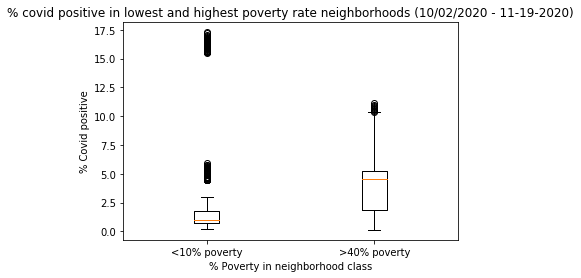

In [38]:
red_Diamond = dict(markerfacecolor='r', marker='D')
plt.xlabel('% Poverty in neighborhood class')
plt.ylabel('% Covid positive')
plt.title('% covid positive in lowest and highest poverty rate neighborhoods (10/02/2020 - 11-19-2020)')
plt.boxplot([under10povcov, over40povcov])
plt.xticks([1,2],['<10% poverty', '>40% poverty'])
plt.savefig('plots/lowesthighest.png')

plt.show()

In [41]:
st.ttest_ind(under10povcov, over40povcov, equal_var=False)

Ttest_indResult(statistic=-13.515357019101572, pvalue=5.2717798375808686e-39)

In [42]:
tentwentypovcov = pd.Series(np.where(covidpovcount200250['Poverty Class'] == '10%-19%', covidpovcount200250['CovPct'], 'NaN')).astype(np.float).dropna()



tentwentyquartiles = tentwentypovcov.quantile([.25,.5,.75])
tentwentylowerq = tentwentyquartiles[0.25]
tentwentyupperq = tentwentyquartiles[.75]
tentwentyiqr = tentwentyupperq-tentwentylowerq
    

tentwentyLowerBound = tentwentylowerq - (1.5*tentwentyiqr)
tentwentyUpperBound = tentwentyupperq + (1.5*tentwentyiqr) 




tentwentyoutliers = [x for x in tentwentypovcov if x > tentwentyUpperBound or x < tentwentyLowerBound]

print(f"The lower quartile of Covid Pct in 10%-19% is: {tentwentylowerq}")
print(f"The upper quartile of Covid Pct in 10%-19% is: {tentwentyupperq}")
print(f"The interquartile range Covid Pct in 10%-19% is: {tentwentyiqr}")
print(f"The median Covid Pct in 10%-19% is: {tentwentyquartiles[0.5]} ")
print(f"Outliers in Covid Pct in 10%-19% are: {tentwentyoutliers} ")


The lower quartile of Covid Pct in 10%-19% is: 1.122754491017964
The upper quartile of Covid Pct in 10%-19% is: 2.1626236196159434
The interquartile range Covid Pct in 10%-19% is: 1.0398691285979793
The median Covid Pct in 10%-19% is: 1.580056179775281 
Outliers in Covid Pct in 10%-19% are: [4.901153212520593, 4.901153212520593, 4.942339373970347, 4.901153212520593, 4.942339373970347, 4.942339373970347, 4.983525535420099, 5.024711696869852, 5.024711696869852, 5.024711696869852, 5.14827018121911, 5.14827018121911, 5.2306425041186175, 5.2306425041186175, 5.313014827018122, 5.354200988467875, 5.354200988467875, 5.395387149917627, 5.436573311367381, 5.436573311367381, 5.5601317957166385, 5.642504118616145, 5.642504118616145, 5.642504118616145, 5.642504118616145, 5.642504118616145, 5.683690280065898, 5.683690280065898, 5.724876441515652, 5.8072487644151565, 5.848434925864908, 5.889621087314662, 5.889621087314662, 5.971993410214168, 6.013179571663921, 6.219110378912685, 6.425041186161449, 6.

In [43]:
twentythirtypovcov = pd.Series(np.where(covidpovcount200250['Poverty Class'] == '20%-29%', covidpovcount200250['CovPct'], 'NaN')).astype(np.float).dropna()



twentythirtyquartiles = twentythirtypovcov.quantile([.25,.5,.75])
twentythirtylowerq = twentythirtyquartiles[0.25]
twentythirtyupperq = twentythirtyquartiles[.75]
twentythirtyiqr = twentythirtyupperq-twentythirtylowerq
    

twentythirtyLowerBound = twentythirtylowerq - (1.5*twentythirtyiqr)
twentythirtyUpperBound = twentythirtyupperq + (1.5*twentythirtyiqr) 




twentythirtyoutliers = [x for x in twentythirtypovcov if x > twentythirtyUpperBound or x < twentythirtyLowerBound]

print(f"The lower quartile of Covid Pct in 20%-29% is: {twentythirtylowerq}")
print(f"The upper quartile of Covid Pct in 20%-29% is: {twentythirtyupperq}")
print(f"The interquartile range Covid Pct in 20%-29% is: {twentythirtyiqr}")
print(f"The median Covid Pct in 20%-29% is: {twentythirtyquartiles[0.5]} ")
print(f"Outliers in Covid Pct in 20%-29% are: {twentythirtyoutliers} ")

The lower quartile of Covid Pct in 20%-29% is: 1.8389342428986803
The upper quartile of Covid Pct in 20%-29% is: 3.669001345145879
The interquartile range Covid Pct in 20%-29% is: 1.8300671022471988
The median Covid Pct in 20%-29% is: 2.616118744454836 
Outliers in Covid Pct in 20%-29% are: [6.477306883077848, 6.469143543920153, 6.537074776610755] 


In [44]:
thirtyfourtypovcov = pd.Series(np.where(covidpovcount200250['Poverty Class'] == '30%-39%', covidpovcount200250['CovPct'], 'NaN')).astype(np.float).dropna()



thirtyfourtyquartiles = thirtyfourtypovcov.quantile([.25,.5,.75])
thirtyfourtylowerq = thirtyfourtyquartiles[0.25]
thirtyfourtyupperq = thirtyfourtyquartiles[.75]
thirtyfourtyiqr = thirtyfourtyupperq-thirtyfourtylowerq
    

thirtyfourtyLowerBound = thirtyfourtylowerq - (1.5*thirtyfourtyiqr)
thirtyfourtyUpperBound = thirtyfourtyupperq + (1.5*thirtyfourtyiqr) 




thirtyfourtyoutliers = [x for x in thirtyfourtypovcov if x > thirtyfourtyUpperBound or x < thirtyfourtyLowerBound]

print(f"The lower quartile of Covid Pct in 30%-39% is: {thirtyfourtylowerq}")
print(f"The upper quartile of Covid Pct in 30%-39% is: {thirtyfourtyupperq}")
print(f"The interquartile range Covid Pct in 30%-39% is: {thirtyfourtyiqr}")
print(f"The median Covid Pct in 30%-39% is: {thirtyfourtyquartiles[0.5]} ")
print(f"Outliers in Covid Pct in 30%-39% are: {thirtyfourtyoutliers} ")

The lower quartile of Covid Pct in 30%-39% is: 2.416720634638372
The upper quartile of Covid Pct in 30%-39% is: 4.420018059937332
The interquartile range Covid Pct in 30%-39% is: 2.0032974252989604
The median Covid Pct in 30%-39% is: 3.2363457774991677 
Outliers in Covid Pct in 30%-39% are: [7.472365899125685, 7.5826397458450385] 


In [47]:
medians = [under10quartiles[0.5], tentwentyquartiles[0.5], twentythirtyquartiles[0.5], thirtyfourtyquartiles[0.5], over40quartiles[0.5]]

In [48]:
medians

[1.0283570136873477,
 1.580056179775281,
 2.616118744454836,
 3.2363457774991677,
 4.5795843033620685]

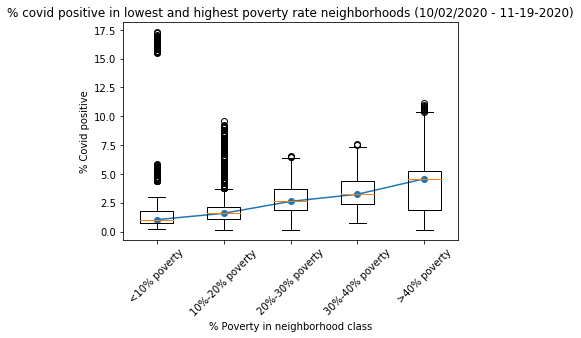

In [50]:
plt.xlabel('% Poverty in neighborhood class')
plt.ylabel('% Covid positive')
plt.title('% covid positive in lowest and highest poverty rate neighborhoods (10/02/2020 - 11-19-2020)')
plt.plot([1,2,3,4,5],medians, marker='o')
plt.boxplot([under10povcov, tentwentypovcov, twentythirtypovcov, thirtyfourtypovcov, over40povcov])
plt.xticks([1,2,3,4,5],['<10% poverty', '10%-20% poverty','20%-30% poverty','30%-40% poverty', '>40% poverty'], rotation=45)
plt.savefig('plots/lowesthighest2.png')

plt.show()

In [51]:
st.ttest_ind(under10povcov, tentwentypovcov, equal_var=False)

Ttest_indResult(statistic=2.5398296550133823, pvalue=0.011240609456281962)

In [53]:
st.ttest_ind(tentwentypovcov, twentythirtypovcov, equal_var=False)

Ttest_indResult(statistic=-23.614478686833902, pvalue=9.164814800454883e-117)

In [54]:
st.ttest_ind(twentythirtypovcov, thirtyfourtypovcov, equal_var=False)

Ttest_indResult(statistic=-13.539816121450697, pvalue=1.0656503521000171e-40)

In [55]:
st.ttest_ind(thirtyfourtypovcov, over40povcov, equal_var=False)

Ttest_indResult(statistic=-8.641496945860402, pvalue=8.82734696042353e-18)